In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### Simple Moving Average

In [4]:
data = pd.read_csv('./data/exchange-rate.csv')
data.set_index('Month', inplace=True)
data.head()

,Exchange Rate TWI
Month,
1,100.0
2,99.6
3,99.4
4,99.1
5,99.2


In [40]:
train = data.iloc[0:212]
test = data.iloc[212:]

len_train = len(train)

In [5]:
def sma(df, window, len_train):
    y_hat_sma = df.copy()
    
    y_hat_sma['sma_forecast'] = y_hat_sma.iloc[:, 0].rolling(window).mean()

    y_hat_sma.iloc[len_train:, 1] = y_hat_sma.iloc[len_train -1, 1]
    
    error = y_hat_sma.iloc[len_train:, 0] - y_hat_sma.iloc[len_train:, 1]

    rmse = np.sqrt(np.sum(error**2)/len(error))
    mape = np.sum(abs(error)/y_hat_sma.iloc[len_train:, 0]) * 100 / len(error)

    print(f"RMSE:{rmse}, MAPE:{mape}")
    
    plt.figure(figsize=(12,4))
    plt.plot(y_hat_sma.iloc[0:len_train, 0], label='train')
    plt.plot(y_hat_sma.iloc[len_train:, 0], label='test')
    plt.plot(y_hat_sma.iloc[:, 1], label = 'SMA Forecast')

    plt.legend()
    plt.title('SMA -' + str(window) + ' month')

RMSE:4.661162968336506, MAPE:6.95564967363325


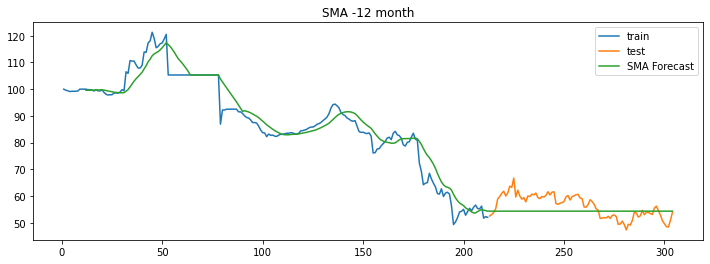

In [45]:
sma(data, 12, len_train )

RMSE:4.9031107645128955, MAPE:7.126565872369923


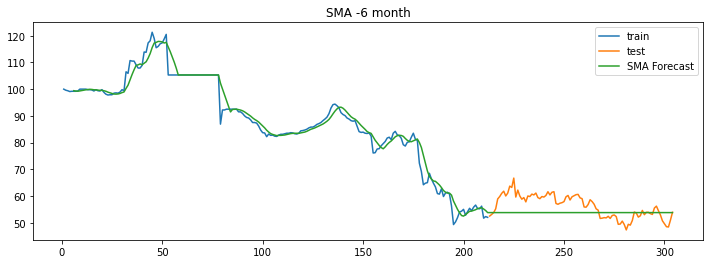

In [46]:
sma(data, 6, len_train )

RMSE:5.983755182739096, MAPE:8.406052283180658


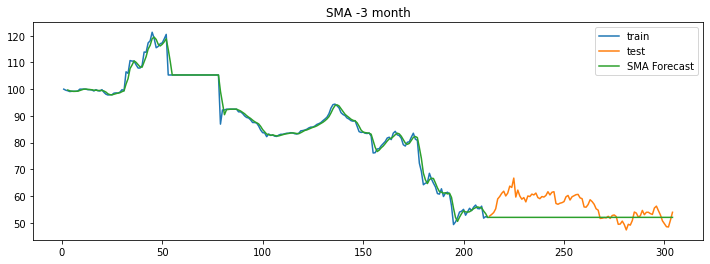

In [47]:
sma(data, 3, len_train )